# Wstęp
W przeciwieństwie do poprzednich zadań tym razem będziemy stosować uczenie nienadzorowane. Klasteryzacja jest najpopularniejszym przykładem tego ów uczenia. Jej celem jest pogrupowanie obiektów tak, aby elementy w obrębie jednego klastra były do siebie podobne i jednocześnie różniły się od elementów innych klastrów. Przypomina to trochę sposób, w jaki ludzie rozpoznają wzorce. Dysponując próbką niezaklasyfikowanych danych, możemy wykorzystać klasteryzację, żeby odkryć istniejące w niej podziały.

## Zadanie 2
Proszę pobrać plik customers_mall.csv, zawierający informacje o klientach pewnego centrum handlowego. Pierwsza kolumna przedstawia ich zarobki (w tysiącach), w drugiej zaś znajduje się punktowa ocena wydatków (od 0 do 100) każdego z klientów.  Proszę dokonać klasteryzacji zbioru z użyciem algorytmu k-means. Uzyskane wyniki należy zwizualizować, ocenić i opisać. Wskazane jest zarekomendowanie odpowiedniej ilości klastrów.

Niezbędne importy

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import skfuzzy as sf

Wczytano plik, znormalizowano oraz zwizualizowano dane

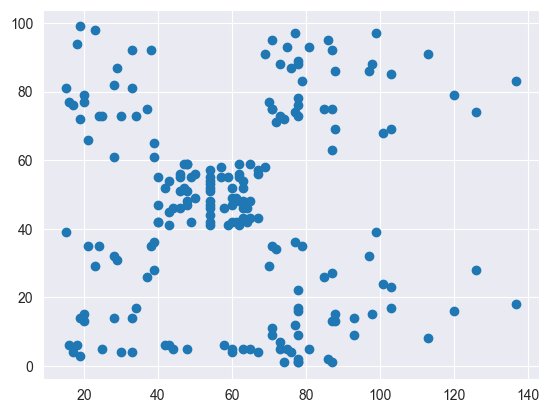

In [96]:
df = pd.read_csv('customers_mall.csv', sep=';')
data_np = df.to_numpy()
scaler = sk.preprocessing.StandardScaler(copy=False)
data_np_scaled = scaler.fit_transform(data_np)
plt.scatter(data_np[:, 0], data_np[:, 1])
plt.show()

Na podstawie wizualizacji oceniono, że podział na 5 klastrów będzie najlepszy.
Wykorzystano algorytm k-means do klasteryzacji.
Wyniki zaprezentowano na wykresie, gdzie każdy kolor to osobny klaster.

silhouette score:  0.541249184228633
davies bouldin score:  0.5781188100232842
calinski harabasz score:  237.05099276561054


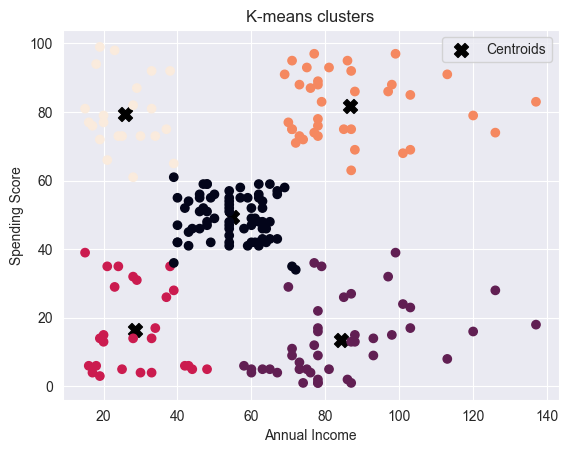

In [97]:
k_means_model = sk.cluster.KMeans(n_clusters=5, random_state=42).fit(data_np_scaled)
labels = k_means_model.fit_predict(data_np_scaled)
sil = sk.metrics.silhouette_score(data_np_scaled, labels)
db = sk.metrics.davies_bouldin_score(data_np_scaled, labels)
ch = sk.metrics.calinski_harabasz_score(data_np_scaled, labels)
print('silhouette score: ', sil)
print('davies bouldin score: ',db)
print('calinski harabasz score: ', ch)
centroids = k_means_model.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='black', marker='X', s=100, label='Centroids')
plt.scatter(data_np[:, 0], data_np[:, 1], c=labels)
plt.title("K-means clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


### Wnioski
Według mnie wykres jasno pokazuje, iż podział jest bardzo dobry. Doskonale widać pogrupowane jednostki w poprawny sposób. Zastosowane metryki również wskazują na wysoką jakość klasteryzacji.

## Zadanie 2
W pliku planets.csv mają państwo zbiór 778 spośród ponad 5000 znanych egzoplanet (planet pozasłonecznych) pozyskany z bazy danych NASA (https://exoplanetarchive.ipac.caltech.edu/index.html). Proszę dokonać klasteryzacji tego zbioru kilkoma sposobami, ocenić wyniki za pomocą odpowiednich metryk, wybrać dowolny z wyników i jego rezultaty (czym się charakteryzują klastry).

Poniżej znajduje się opis kolumn do zestawu danych:


         pl_name:        Planet Name,
         pl_orbper:      Orbital Period [days]',
         pl_orbsmax:     Orbit Semi-Major Axis [au]),
         pl_rade:        Planet Radius [Earth Radius],
         pl_masse:       Planet Mass [Earth Mass],
         pl_orbeccen:    Eccentricity,
         pl_eqt:         Equilibrium Temperature [K],
         st_teff:        Stellar Effective Temperature [K],
         st_mass:        Stellar Mass [Solar mass],
         sy_dist:        Distance [pc]

Wczytano dane z pliku oraz znormalizowano.
Następnie, na podstawie metryki Silhouette oceniono, że podział na 3 klastry będzie tutaj najlepszy i taki też zastosowano.

In [98]:
df = pd.read_csv('planets.csv', sep=',')
data_np = df.iloc[:,1:].to_numpy()
data_np_scaled = scaler.fit_transform(data_np)
for k in range(2,30):
    k_means_model = sk.cluster.KMeans(n_clusters= k, random_state=42).fit(data_np_scaled)
    labels = k_means_model.labels_
    score = sk.metrics.silhouette_score(data_np, labels)
    print(f"k={k} score={score:0.3f}")


k=2 score=0.309
k=3 score=0.310
k=4 score=0.221
k=5 score=0.229
k=6 score=0.204
k=7 score=0.212
k=8 score=0.225
k=9 score=0.243
k=10 score=0.229
k=11 score=0.213
k=12 score=0.215
k=13 score=0.228
k=14 score=0.234
k=15 score=0.249
k=16 score=0.247
k=17 score=0.237
k=18 score=0.241
k=19 score=0.244
k=20 score=0.224
k=21 score=0.201
k=22 score=0.203
k=23 score=0.196
k=24 score=0.197
k=25 score=0.194
k=26 score=0.201
k=27 score=0.206
k=28 score=0.209
k=29 score=0.208


Wykonano klasteryzacje za pomocą kolejno K-means, Dbscan oraz AgglomerativeClustering. Wyniki wypisano kolejno w tabeli. 

In [99]:
models = {
    'KMeans': sk.cluster.KMeans(n_clusters=3, random_state=42),
    'DBSCAN': sk.cluster.DBSCAN(eps=0.80, min_samples=5),
    'Agglomerative': sk.cluster.AgglomerativeClustering(n_clusters=3)
}

print(f"{'Model':<25} | {'Silhouette':>10} | {'Davies-Bouldin':>15} | {'Calinski-Harabasz':>20} | {'Clusters':>10} | {'Outliers':>10}")
print('-' * 100)

for name, model in models.items():
    
    labels = model.fit_predict(data_np_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    outliers = np.count_nonzero(labels == -1)

    sil = sk.metrics.silhouette_score(data_np_scaled, labels)
    db = sk.metrics.davies_bouldin_score(data_np_scaled, labels)
    ch = sk.metrics.calinski_harabasz_score(data_np_scaled, labels)

    print(f"{name:<25} | {sil:10.4f} | {db:15.4f} | {ch:20.2f} | {n_clusters:10} | {outliers:10}")
    

Model                     | Silhouette |  Davies-Bouldin |    Calinski-Harabasz |   Clusters |   Outliers
----------------------------------------------------------------------------------------------------
KMeans                    |     0.3102 |          0.8578 |               266.88 |          3 |          0
DBSCAN                    |    -0.1682 |          2.0656 |                24.72 |          4 |        211
Agglomerative             |     0.2885 |          0.9009 |               246.33 |          3 |          0


Policzono średnie wartości danych parametrów dla dopasowania algorytmu k-means w poszczególnych klastrach.

In [100]:
labels = sk.cluster.KMeans(n_clusters=3, random_state=42).fit_predict(data_np_scaled)
df_kmeans = df.iloc[:,1:]
df_kmeans['cluster'] = labels
cluster_profile = df_kmeans.groupby('cluster').mean()
print(cluster_profile)



           pl_orbper  pl_orbsmax    pl_rade     pl_masse  pl_orbeccen  \
cluster                                                                 
0          24.894066    0.112927   5.217645   118.039566     0.092082   
1           6.023869    0.060065  14.001382   567.899476     0.076648   
2        3650.000000    4.500000  12.442000  4131.790000     0.000000   

              pl_eqt      st_teff   st_mass     sy_dist  
cluster                                                  
0         829.681690  4776.285070  0.759577  152.972810  
1        1582.895735  6042.498175  1.214123  490.764815  
2         183.000000  4898.000000  0.900000  551.886000  


### Wnioski
W związku z tym, że DBscan sam dobiera ilość klastrów, dobrano jego parametry tak, aby ilość klastrów była podobna do pozostałych algorytmów i jednocześnie liczba outlierów nie była zbyt duża. Dbscan wyznaczył 4 klastry, co nie odbiega zbytnio od 3 dla innych algorytmów, natomiast wyznaczona ilość outlierów jest zdecydowanie za duża, co według mnie wyklucza branie jego wyniku na poważnie. Dodatkowo metryki jasno wskazują, że poradził on sobie najgorzej.
Jeśli chodzi o pozostałe dwa algorytmy, to można zauważyć, że wyniki są dosyć podobne i równie dobre. K-means dla każdej z metryk osiągnął lepszy wynik, co pozwala mi wnioskować, iż algorytm ten najlepiej poradził sobie z klasteryzacją w tym przypadku.

Zdecydowałem się ocenić klasteryzacje k-means i jakie poszczególne klastry mają cechy wspólne.
- 1 -> To są planety relatywnie małe i blisko swojej gwiazdy, o dość niskiej temperaturze gwiazdy.
- 2 -> To są bardzo gorące i duże planety, krążące bardzo blisko swoich masywnych, gorących gwiazd.
- 3 ->Te planety są duże, bardzo masywne, zimne i krążą bardzo daleko.

## Zadanie 3
Z użyciem algorytmu fuzzy clustering proszę zaproponować model dla podanego powyżej zestawu danych. Do uczenia należy wybrać wyłącznie połowę jego kolumn.

Wybrano pierwsze 4 kolumny

In [101]:
data_np_scaled_partitioned = data_np_scaled[:, 0:4]
data_np_scaled_partitioned_T = data_np_scaled_partitioned.T
cntr, u, _, _, _, _, _ = sf.cluster.cmeans(
    data_np_scaled_partitioned_T, c=3, m=2.0, error=0.005, maxiter=1000, init=None
)

In [102]:
labels_fcm = np.argmax(u, axis=0)
sil = sk.metrics.silhouette_score(data_np_scaled_partitioned, labels_fcm)
db = sk.metrics.davies_bouldin_score(data_np_scaled_partitioned, labels_fcm)
ch = sk.metrics.calinski_harabasz_score(data_np_scaled_partitioned, labels_fcm)
print(f"{'Fuzzy C-Means':<25} | {sil:10.4f} | {db:15.4f} | {ch:20.2f} | 3")

Fuzzy C-Means             |     0.5689 |          0.9507 |               251.53 | 3


### Wnioski
Porównując wyniki z poprzednimi algorytmami, widać, że algorytm fuzzy clustering osiągnął o wiele lepszy wynik w metryce Silhouette, natomiast dla dwóch kolejnych wyniki są bardzo zbliżone lub nieco gorsze. Można na podstawie tego wywnioskować, iż ten algorytm stworzył bardziej elastyczne i realistyczne klastry, które są bliższe rzeczywistemu rozkładowi danych, ale nie są idealnie kuliste ani równo oddzielone. Na podstawie tego stwierdzam, że doszło tutaj do zbyt dużego dopasowaniu się do szumu. 

## Zadanie 4
Dla zbioru danych circle.csv proszę, wykorzystując wszystkie (za wyjątkiem c-means) poznane do tej pory algorytmy klasteryzacyjne, podjąć kilka prób dopasowania jak najlepszego modelu, za każdym razem oceniając rozwiązanie z użyciem dedykowanych do tego metryk. Który z algorytmów najlepiej radzi sobie z takim układem danych i dlaczego? Proszę przedstawić wyniki również w formie odpowiednich wizualizacji.

Wczytuje dane z pliku i wizualizujemy. Widać, że dane tworzą 2 pierścienie, także docelowo dopasowanie do 2 klastrów byłoby idealne.

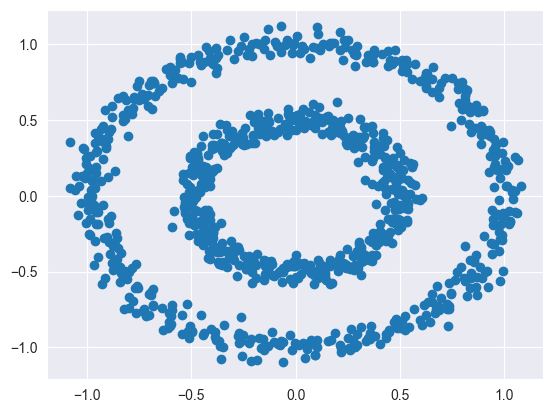

In [103]:
df = pd.read_csv("circle.csv")
data_np = df.to_numpy()
plt.scatter(data_np[:, 0], data_np[:, 1])
plt.show()

Zgodnie z poleceniem stosujemy 3 algorytmy do znalezienia poprawnej klasteryzacji zbioru (K-means, AgglomerativeClustering oraz DBscan). Zastosowano pętle, aby przetestować wiele opcji doboru argumentów podczas klasteryzacji.

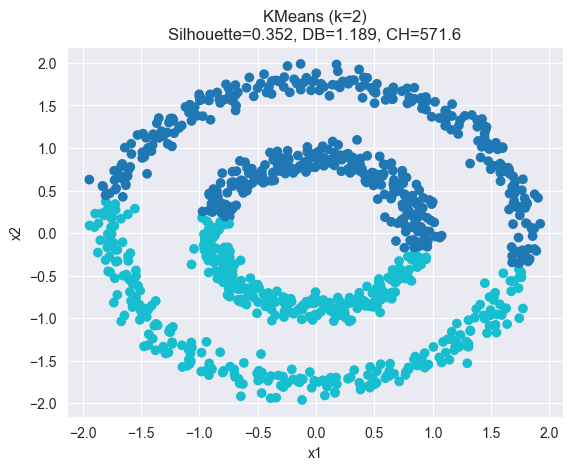

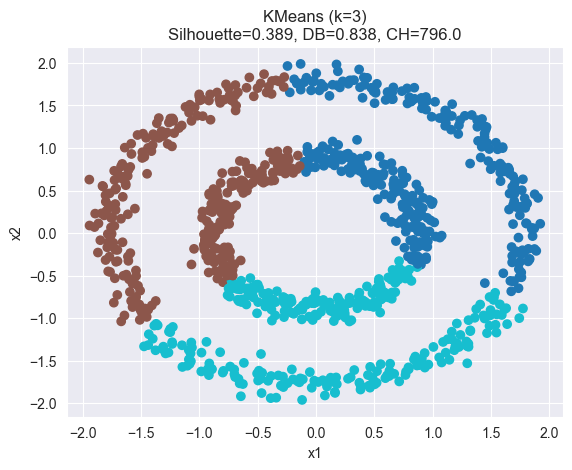

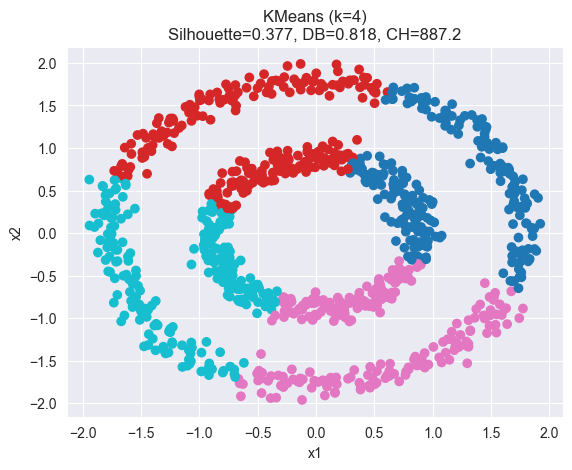

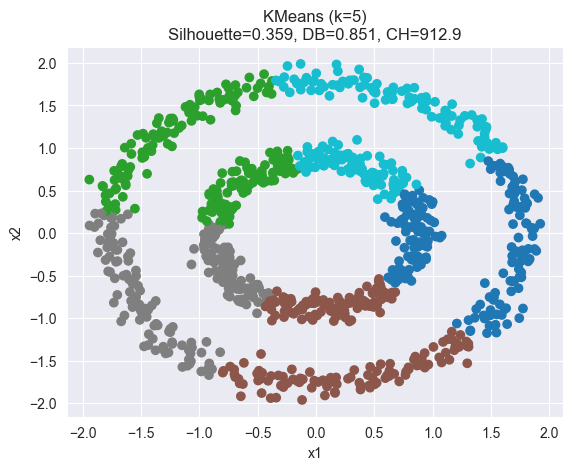

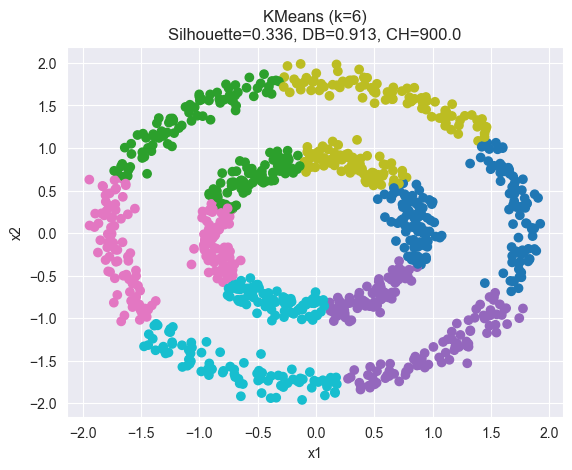

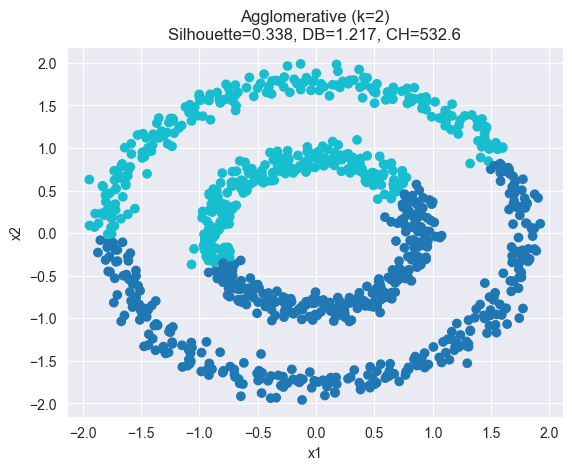

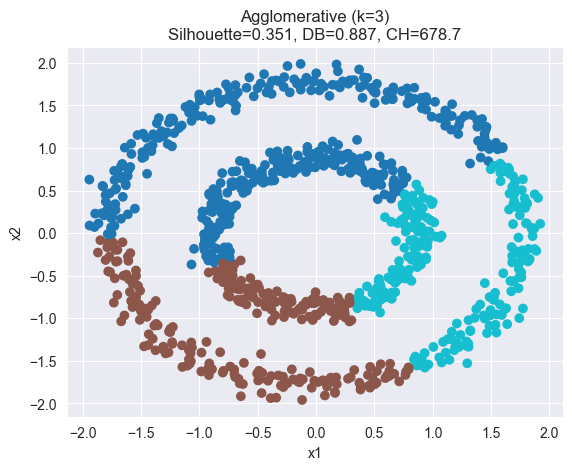

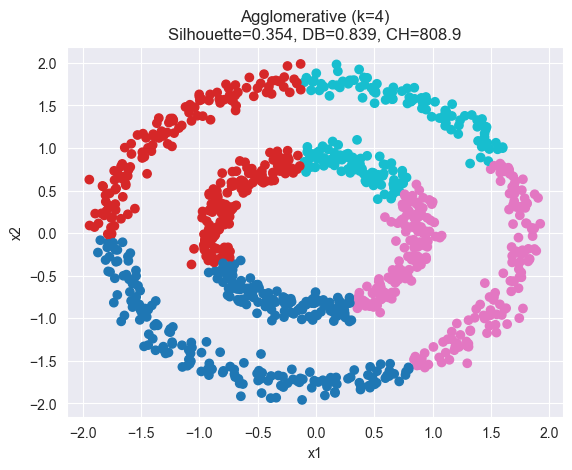

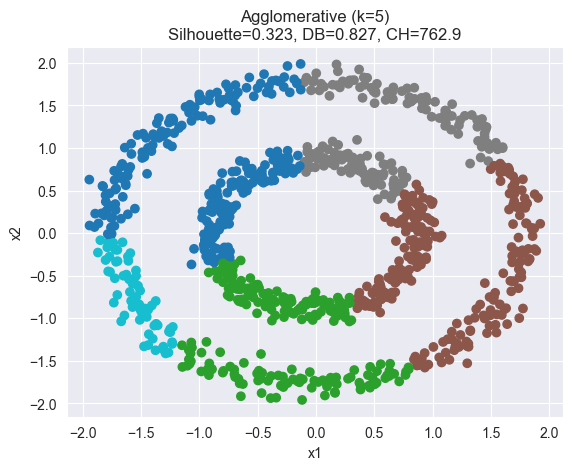

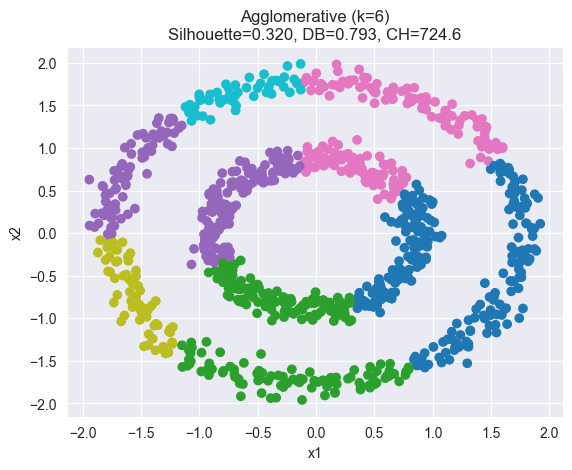

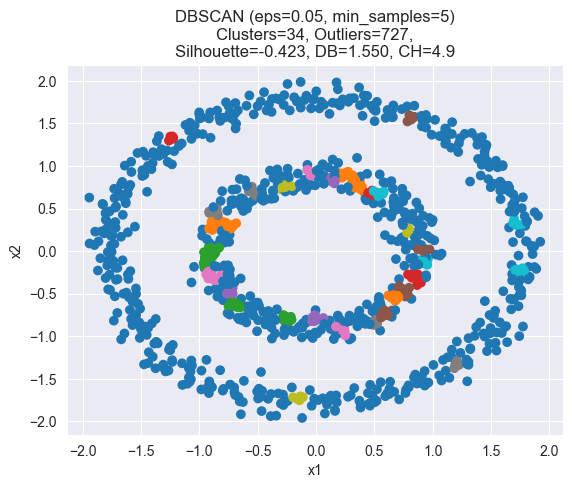

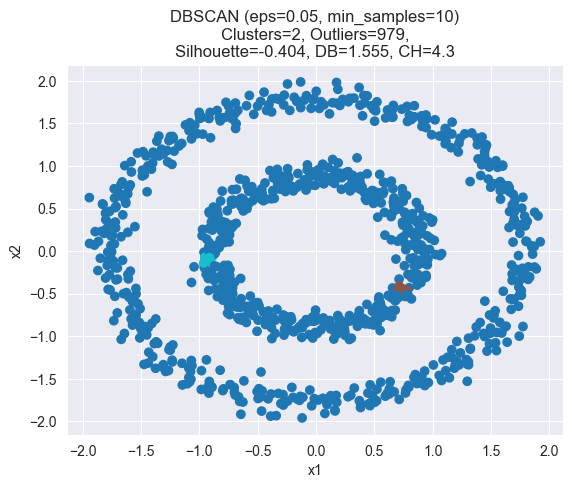

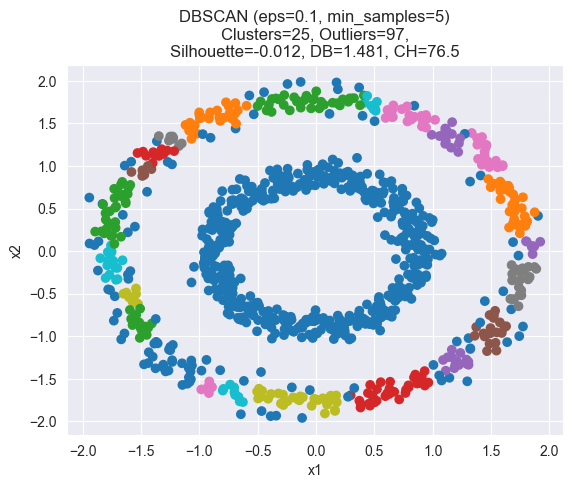

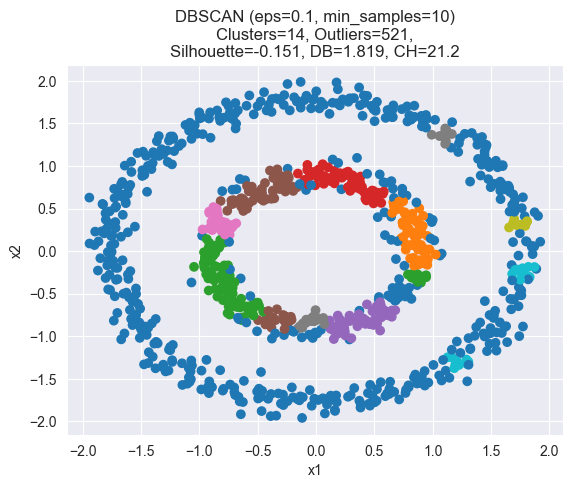

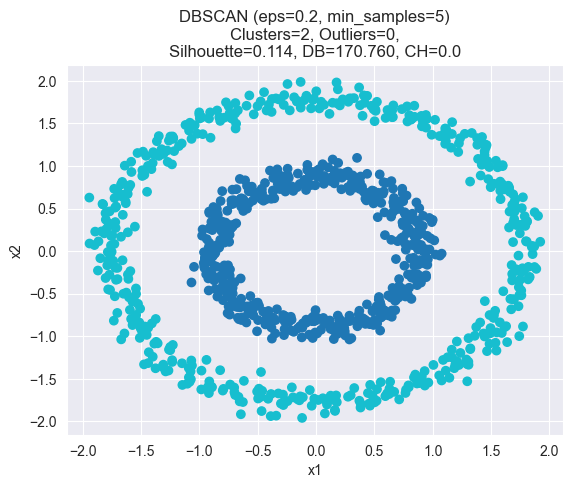

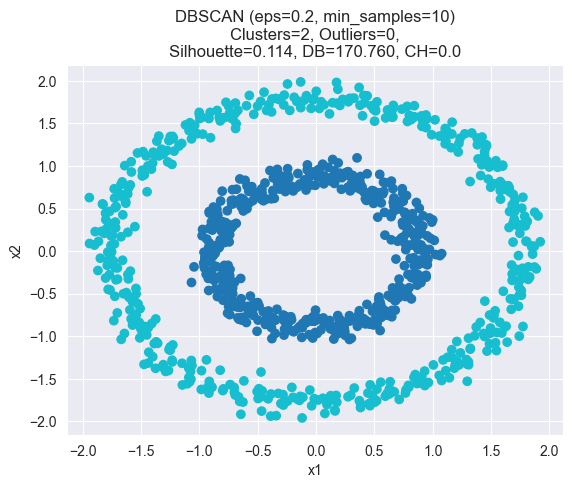

In [104]:
data_np_scaled = scaler.fit_transform(data_np)
for k in range(2, 7):
    model = sk.cluster.KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(data_np_scaled)

    sil = sk.metrics.silhouette_score(data_np_scaled, labels)
    db = sk.metrics.davies_bouldin_score(data_np_scaled, labels)
    ch = sk.metrics.calinski_harabasz_score(data_np_scaled, labels)

    plt.figure()
    plt.scatter(data_np[:, 0], data_np[:, 1], c=labels, cmap='tab10')
    plt.title(f"KMeans (k={k})\nSilhouette={sil:.3f}, DB={db:.3f}, CH={ch:.1f}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

for k in range(2, 7):
    model = sk.cluster.AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(data_np_scaled)

    sil = sk.metrics.silhouette_score(data_np_scaled, labels)
    db = sk.metrics.davies_bouldin_score(data_np_scaled, labels)
    ch = sk.metrics.calinski_harabasz_score(data_np_scaled, labels)

    plt.figure()
    plt.scatter(data_np[:, 0], data_np[:, 1], c=labels, cmap='tab10')
    plt.title(f"Agglomerative (k={k})\nSilhouette={sil:.3f}, DB={db:.3f}, CH={ch:.1f}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

eps_values = [0.05, 0.1, 0.2]
min_samples_values = [5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        model = sk.cluster.DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(data_np_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        outliers = np.count_nonzero(labels == -1)

        if n_clusters < 2:
            continue

        sil = sk.metrics.silhouette_score(data_np_scaled, labels)
        db = sk.metrics.davies_bouldin_score(data_np_scaled, labels)
        ch = sk.metrics.calinski_harabasz_score(data_np_scaled, labels)

        plt.figure()
        plt.scatter(data_np[:, 0], data_np[:, 1], c=labels, cmap='tab10')
        plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})\n"
                  f"Clusters={n_clusters}, Outliers={outliers},\n"
                  f"Silhouette={sil:.3f}, DB={db:.3f}, CH={ch:.1f}")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.grid(True)
        plt.show()


### Wnioski
K-means i Agglomerative Clustering:
- Wyniki metryk są bardzo dobre dla każdej z testowanych ilości klastrów
- Widać, że dane zostały podzielone tworząc coś na wzór symetrycznego wykresu kołowego
- Według mnie dane nie zostały podzielone poprawnie dla żadnej ilości klastrów
- Ten przykład bardzo dobrze pokazuje, iż metryki nie są niezawodne i nie gwarantują dobrego dopasowania mimo dobrych wyników
DBscan:
- Dla eps < 0.2 dbscan zgubił bardzo dużo danych, przydzielając je do outlierów. Jest to zachowanie zdecydowanie niepożądane i decydujące o tym, że algorytmy te nie poradziły sobie z dopasowanie.
- Dla eps = 0.2 algorytmy poradziły sobie bardzo dobrze. Dane zostały podzielone na dwa klastry (zewnętrzny oraz wewnętrzny pierścień). Żadne dane nie zostały zaklasyfikowane jako outliery. Zdecydowanie był to najlepszy algorytm dla tego typu danych.
- Rozmiar minimalnej próbki nie miał wpływu na zachowanie algorytmu dla eps = 2, natomiast dla eps < 2 mniejsza zmniejszenie minimalnej próbki powodował znaczne zwiększenie się ilości klastrów.